In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm

In [3]:
rawdata=[]
for line in open('M67_data.txt','r').read().split('\n'):
    rawdata.append(line.split(' '))
print(rawdata[0])
data=[]
for stardata in rawdata[1:]:
    if len(stardata)==len(rawdata[0]):
        data.append(stardata)

ages=[]
age_sigmas=[]
for stardata in data:
    age=float(stardata[-1].split('(')[0])
    sigma=stardata[-1].split('(')[1][:-1]
    if '.' not in sigma:
        sigma=float('0.'+sigma)
    else: sigma=float(sigma)
    ages.append(age)
    age_sigmas.append(sigma)
Xobs=ages
sigma_obs=np.average(age_sigmas)
N=len(ages)
print(np.mean(ages),sigma_obs)

['EPIC_ID', 'WOCS_ID', 'Class', 'Î½max', 'âˆ†Î½', 'Teff/K', 'Rsc', 'Msc', 'log_gsc', 'Rcorr', 'Mcorr', 'Rgrid', 'Mgrid', 'log_ggrid', 'Agegrid']
4.787096774193548 1.5612903225806454


In [8]:
#hyperprior
Mu=4
del_mu=40
Sigma=0.5
del_sigma=5

#HMC
model=pm.Model()
with model:
    mu=pm.Lognormal('mu',np.log10(Mu),np.log10(del_mu))
    sigma=pm.HalfNormal('sigma',np.log10(del_sigma))
    
    xtrue = pm.Normal('xtrue', mu, sigma, shape=N)
    xobs = pm.Normal('xobs', xtrue, np.array(age_sigmas), observed=Xobs)

with model:
    trace = pm.sample(tune=50000,chains=4,target_accept=0.9)

pm.summary(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [xtrue, sigma, mu]
Sampling 4 chains: 100%|███████████████████████████████████████████████████| 202000/202000 [07:59<00:00, 421.46draws/s]
The acceptance probability does not match the target. It is 0.8295506031643849, but should be close to 0.9. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
xtrue__0,3.820960,0.802214,0.021411,2.328063,5.567551,1376.769285,0.999509
xtrue__1,3.966592,0.863704,0.026735,2.288579,5.764821,759.990656,1.000928
xtrue__2,3.799245,0.794584,0.021445,2.260011,5.565815,1543.532260,1.000328
xtrue__3,4.122004,0.870070,0.031893,2.763525,6.130577,565.320318,1.000340
xtrue__4,3.926051,0.808483,0.023272,2.401932,5.691271,971.383863,0.999675
xtrue__5,3.702511,0.753603,0.015553,2.261326,5.247090,2424.808726,0.999402
xtrue__6,3.921761,0.823469,0.024793,2.404804,5.680338,955.351431,1.000514
xtrue__7,5.018010,1.216398,0.071520,3.190291,7.535709,179.350837,1.007349
xtrue__8,4.030835,0.531850,0.018624,3.066977,5.107987,591.279945,1.000391
xtrue__9,3.329363,0.633992,0.015896,2.053028,4.588663,1706.666660,1.001966


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000260FF04EDD8>,
      dtype=object)

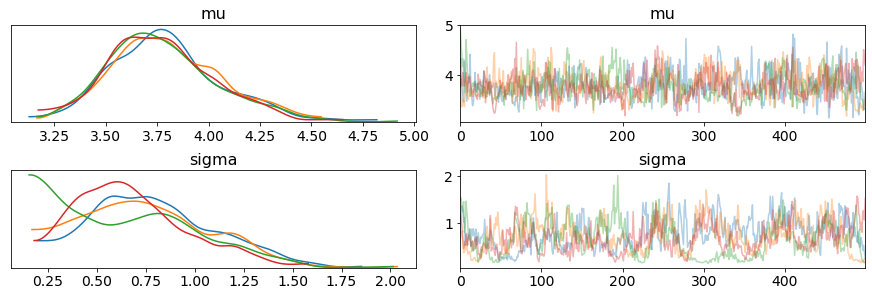

In [9]:
pm.plots.traceplot(trace,var_names=['mu','sigma'])

In [21]:
#round 2, with bigger observational errors
#1.5
#hyperprior
Mu=4
del_mu=40
Sigma=0.5
del_sigma=5

#HMC
model=pm.Model()
with model:
    mu=pm.Lognormal('mu',np.log10(Mu),np.log10(del_mu))
    sigma=pm.HalfNormal('sigma',np.log10(del_sigma))
    
    xtrue = pm.Normal('xtrue', mu, sigma, shape=N)
    xobs = pm.Normal('xobs', xtrue, np.array(age_sigmas)*1.5, observed=Xobs)

with model:
    trace = pm.sample(tune=50000,chains=2,target_accept=0.9)

pm.summary(trace,var_names=['mu','sigma'])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [xtrue, sigma, mu]
Sampling 2 chains: 100%|███████████████████████████████████████████████████| 101000/101000 [06:25<00:00, 262.30draws/s]
There were 12 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8366774004738647, but should be close to 0.9. Try to increase the number of tuning steps.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,3.548318,0.702317,0.062108,2.260470,4.816230,41.86957,1.028061
sigma,0.514177,0.377441,0.034530,0.086453,1.315488,25.39434,1.004812


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000260FEA1D0F0>,
      dtype=object)

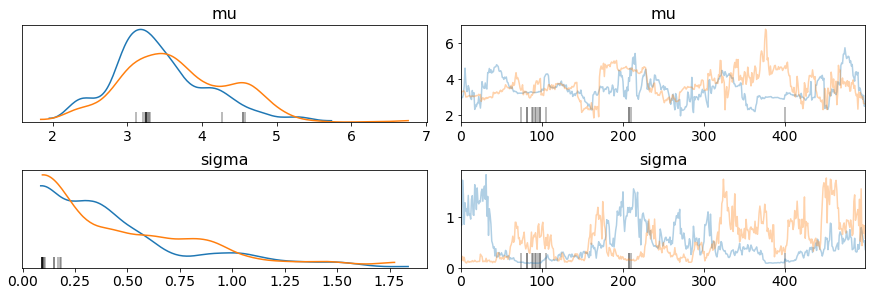

In [22]:
pm.plots.traceplot(trace,var_names=['mu','sigma'])

In [ ]:
#2.0
#hyperprior
Mu=4
del_mu=40
Sigma=0.5
del_sigma=5

#HMC
model=pm.Model()
with model:
    mu=pm.Lognormal('mu',np.log10(Mu),np.log10(del_mu))
    sigma=pm.HalfNormal('sigma',np.log10(del_sigma))
    
    xtrue = pm.Normal('xtrue', mu, sigma, shape=N)
    xobs = pm.Normal('xobs', xtrue, np.array(age_sigmas)*2, observed=Xobs)

with model:
    trace = pm.sample(tune=50000,chains=2,target_accept=0.9)

pm.summary(trace,var_names=['mu','sigma'])

In [ ]:
pm.plots.traceplot(trace,var_names=['mu','sigma'])

In [ ]:
#2.5
#hyperprior
Mu=4
del_mu=40
Sigma=0.5
del_sigma=5

#HMC
model=pm.Model()
with model:
    mu=pm.Lognormal('mu',np.log10(Mu),np.log10(del_mu))
    sigma=pm.HalfNormal('sigma',np.log10(del_sigma))
    
    xtrue = pm.Normal('xtrue', mu, sigma, shape=N)
    xobs = pm.Normal('xobs', xtrue, np.array(age_sigmas)*2, observed=Xobs)

with model:
    trace = pm.sample(tune=50000,chains=2,target_accept=0.9)

pm.summary(trace,var_names=['mu','sigma'])

In [ ]:
#2.5
#hyperprior
Mu=4
del_mu=40
Sigma=0.5
del_sigma=5

#HMC
model=pm.Model()
with model:
    mu=pm.Lognormal('mu',np.log10(Mu),np.log10(del_mu))
    sigma=pm.HalfNormal('sigma',np.log10(del_sigma))
    
    xtrue = pm.Normal('xtrue', mu, sigma, shape=N)
    xobs = pm.Normal('xobs', xtrue, np.array(age_sigmas)*2.5, observed=Xobs)

with model:
    trace = pm.sample(tune=50000,chains=2,target_accept=0.9)

pm.summary(trace,var_names=['mu','sigma'])

In [ ]:
#3.0
#hyperprior
Mu=4
del_mu=40
Sigma=0.5
del_sigma=5

#HMC
model=pm.Model()
with model:
    mu=pm.Lognormal('mu',np.log10(Mu),np.log10(del_mu))
    sigma=pm.HalfNormal('sigma',np.log10(del_sigma))
    
    xtrue = pm.Normal('xtrue', mu, sigma, shape=N)
    xobs = pm.Normal('xobs', xtrue, np.array(age_sigmas)*3, observed=Xobs)

with model:
    trace = pm.sample(tune=50000,chains=2,target_accept=0.9)

pm.summary(trace,var_names=['mu','sigma'])

In [23]:
#3.5
#hyperprior
Mu=4
del_mu=40
Sigma=0.5
del_sigma=5

#HMC
model=pm.Model()
with model:
    mu=pm.Lognormal('mu',np.log10(Mu),np.log10(del_mu))
    sigma=pm.HalfNormal('sigma',np.log10(del_sigma))
    
    xtrue = pm.Normal('xtrue', mu, sigma, shape=N)
    xobs = pm.Normal('xobs', xtrue, np.array(age_sigmas)*3.5, observed=Xobs)

with model:
    trace = pm.sample(tune=50000,chains=2,target_accept=0.9)

pm.summary(trace,var_names=['mu','sigma'])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [xtrue, sigma, mu]


KeyboardInterrupt: 

In [ ]:
#4.0
#hyperprior
Mu=4
del_mu=40
Sigma=0.5
del_sigma=5

#HMC
model=pm.Model()
with model:
    mu=pm.Lognormal('mu',np.log10(Mu),np.log10(del_mu))
    sigma=pm.HalfNormal('sigma',np.log10(del_sigma))
    
    xtrue = pm.Normal('xtrue', mu, sigma, shape=N)
    xobs = pm.Normal('xobs', xtrue, np.array(age_sigmas)*4, observed=Xobs)

with model:
    trace = pm.sample(tune=50000,chains=2,target_accept=0.9)

pm.summary(trace,var_names=['mu','sigma'])

In [ ]:
#4.5
#hyperprior
Mu=4
del_mu=40
Sigma=0.5
del_sigma=5

#HMC
model=pm.Model()
with model:
    mu=pm.Lognormal('mu',np.log10(Mu),np.log10(del_mu))
    sigma=pm.HalfNormal('sigma',np.log10(del_sigma))
    
    xtrue = pm.Normal('xtrue', mu, sigma, shape=N)
    xobs = pm.Normal('xobs', xtrue, np.array(age_sigmas)*2, observed=Xobs)

with model:
    trace = pm.sample(tune=50000,chains=4.5,target_accept=0.9)

pm.summary(trace,var_names=['mu','sigma'])

In [ ]:
#5.0
#hyperprior
Mu=4
del_mu=40
Sigma=0.5
del_sigma=5

#HMC
model=pm.Model()
with model:
    mu=pm.Lognormal('mu',np.log10(Mu),np.log10(del_mu))
    sigma=pm.HalfNormal('sigma',np.log10(del_sigma))
    
    xtrue = pm.Normal('xtrue', mu, sigma, shape=N)
    xobs = pm.Normal('xobs', xtrue, np.array(age_sigmas)*2, observed=Xobs)

with model:
    trace = pm.sample(tune=50000,chains=5,target_accept=0.9)

pm.summary(trace,var_names=['mu','sigma'])